In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("gurgaon_outliers_treated.csv")

In [4]:
df

property_type                                            society  \
0             flat                            signature global park 4   
1             flat                                   smart world gems   
2             flat                             breez global hill view   
3             flat                        bestech park view sanskruti   
4             flat                                     suncity avenue   
5             flat                                     paras quartier   
6             flat                             experion the heartsong   
7             flat                            adani m2k oyster grande   
8            house                                        independent   
9            house                                   dlf city phase 1   
10           house                                        independent   
11            flat                                   dlf regency park   
12            flat                                     ats tourmaline   
13            flat                   emaar mgf emerald floors premier   
14           house                                        independent   
15            flat                        bestech park view sanskruti   
16            flat                                        ss the leaf   
17            flat                             capital residences 360   
18            flat                                        ss the leaf   
19            flat                                afnhb jalvayu vihar   
20            flat                                      m3m woodshire   
21            flat                                     godrej habitat   
22            flat                         ansal api celebrity suites   
23           house                                        independent   
24           house                                        independent   
25            flat                                 chanderlok society   
26           house                                        independent   
27           house                international city by sobha phase 2   
28            flat                                    emaar digihomes   
29           house                                     uppal southend   
30            flat                                      vipul lavanya   
31            flat                                        m3m heights   
32            flat                           emaar mgf the palm drive   
33           house                                        greenopolis   
34            flat                                   dlf the skycourt   
35           house                                 vipul tatvam villa   
36           house                international city by sobha phase 1   
37            flat                                     the arzoo cghs   
38            flat                                       corona optus   
39            flat                                         lotus homz   
40            flat                                         m3m merlin   
41           house                               housing board colony   
42            flat                             puri diplomatic greens   
43            flat                            la vida by tata housing   
44           house                          ganpati heights apartment   
45            flat                                smart world orchard   
46            flat                               tata gurgaon gateway   
47            flat                                       tulip violet   
48            flat                                   smart world gems   
49            flat                                 ireo the corridors   
50            flat                     signature global the millennia   
51            flat                             vatika the seven lamps   
52            flat                                     tulip monsella   
53            flat                                        m3m s

In [5]:
df.shape

(3680, 23)

In [6]:
df.isna().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1765
built_up_area          2051
carpet_area            1768
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

### built_up_area

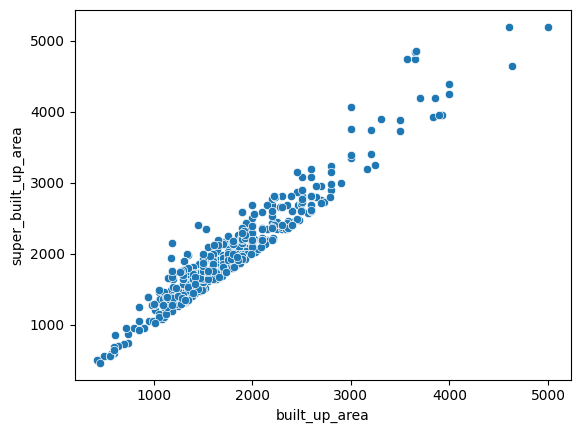

In [7]:
sns.scatterplot(data=df, x="built_up_area", y="super_built_up_area");

#### from the above scatterplot it is clear that there is a strong linear relationship between built_up_area and super_built_up_area

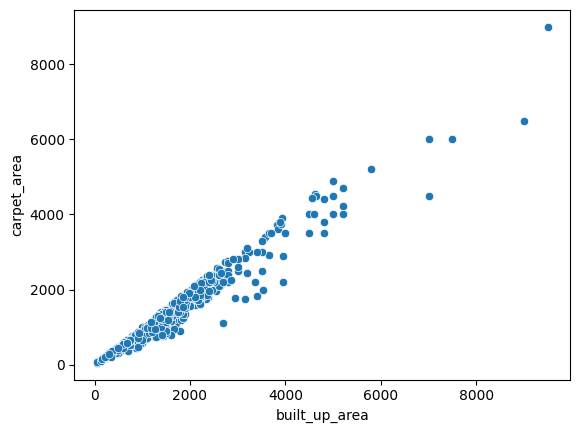

In [8]:
sns.scatterplot(data=df, x="built_up_area", y="carpet_area");

#### from the above scatterplot it is clear that there is a strong linear relationship between built_up_area and carpet_area

In [9]:
# check for the rows where all the values are missing i.e built_up_area, super_built_up_area and carpet_area 
df[(df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull()) & (df["carpet_area"].isnull())]

Empty DataFrame
Columns: [property_type, society, sector, price, price_per_sqft, area, areaWithType, bedRoom, bathroom, balcony, floorNum, facing, agePossession, super_built_up_area, built_up_area, carpet_area, study room, servant room, store room, pooja room, others, furnishing_type, luxury_score]
Index: []

In [10]:
# get the rows where all the data is present i.e built_up_area, super_built_up_area and carpet_area 
all_area_data_present = df[~((df["super_built_up_area"].isnull()) | (df["built_up_area"].isnull()) | (df["carpet_area"].isnull()))]

In [11]:
all_area_data_present.shape

(534, 23)

In [12]:
# extract the rows where super_built_up_area and carpet_area is present but built_up_area is not present 
superbuilt_and_carpet_df = df[(~df["super_built_up_area"].isnull()) & (~df["carpet_area"].isnull()) & (df["built_up_area"].isnull())]

In [13]:
superbuilt_and_carpet_df

property_type                                       society      sector  \
0             flat                       signature global park 4   sector 36   
4             flat                                suncity avenue  sector 102   
38            flat                                  corona optus   sector 37   
40            flat                                    m3m merlin   sector 67   
45            flat                           smart world orchard   sector 61   
50            flat                signature global the millennia  sector 37d   
60            flat                                avl 36 gurgaon   sector 36   
80            flat                                    hero homes  sector 104   
82            flat                               eldeco accolade  sohna road   
87            flat          shapoorji pallonji joyville gurugram  sector 102   
91            flat                     pivotal devaan apartments   sector 84   
94            flat                                    tarc maceo   sector 91   
100           flat                                dlf the primus  sector 82a   
112           flat                                  tulip violet   sector 69   
131           flat                                 m3m soulitude   sector 89   
135           flat                                 m3m woodshire  sector 107   
155           flat                                dlf the primus  sector 82a   
160           flat                             dlf regal gardens   sector 90   
167           flat                                   ats triumph  sector 104   
175           flat                       shree vardhman victoria   sector 70   
183           flat                       signature global solera  sector 107   
196           flat                          emaar gurgaon greens  sector 102   
198           flat                ramson kshitij sec-95 gurugram   sector 95   
207           flat  the khushboo cooperative housing society ltd    sector 9   
211           flat                   bestech park view grand spa   sector 81   
230           flat          shapoorji pallonji joyville gurugram  sector 102   
232           flat              emaar mgf emerald floors premier   sector 65   
246           flat                                dlf the primus  sector 82a   
257           flat                          emaar gurgaon greens  sector 102   
263           flat                                 m3m woodshire  sector 107   
276           flat                      pareena coban residences   sector 99   
301           flat                            emaar palm gardens   sector 83   
347           flat                         alpha corp gurgaonone   sector 84   
358           flat                         alpha corp gurgaonone   sector 84   
360           flat          shapoorji pallonji joyville gurugram  sector 102   
401           flat                         alpha corp gurgaonone   sector 84   
404           flat                       shree vardhman victoria   sector 70   
415           flat                                 ashiana anmol  sohna road   
417           flat                                    sobha city  sector 108   
418           flat                          breez global heights  sohna road   
430           flat                                   ss the leaf   sector 85   
439           flat                            imperia the esfera   sector 37   
445           flat                         elan the presidential  sector 106   
449           flat                                   rof aalayas  sector 102   
458           flat                                    bptp terra  sector 37d   
471           flat                            mapsko mount ville   sector 79   
483           flat                      pareena laxmi apartments   sector 99   
517           flat                   bestech park view grand spa   sector 81   
518           flat                            emaar palm gardens   sector 83   
519  

In [14]:
# calculate the super_built_up_area to built_up_area ratio
superbuilt_to_built_ratio = (all_area_data_present["super_built_up_area"]/all_area_data_present["built_up_area"]).median()

In [15]:
# calculate the carpet_area to built_up_area ratio 
carpet_to_built_ratio = (all_area_data_present["carpet_area"]/all_area_data_present["built_up_area"]).median()

In [16]:
print("Super built up to built up area ratio: ", superbuilt_to_built_ratio)
print("Carpet area to built up area ratio: ", carpet_to_built_ratio)

Super built up to built up area ratio:  1.1048701298701298
Carpet area to built up area ratio:  0.900140056022409


In [17]:
# fill the missing values in the built_up_area column
superbuilt_and_carpet_df["built_up_area"].fillna(round(((superbuilt_and_carpet_df["super_built_up_area"]/1.105) + (superbuilt_and_carpet_df["carpet_area"]/0.9))/2), inplace=True)

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17712\620426307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superbuilt_and_carpet_df["built_up_area"].fillna(round(((superbuilt_and_carpet_df["super_built_up_area"]/1.105) + (superbuilt_and_carpet_df["carpet_area"]/0.9))/2), inplace=True)


In [18]:
# update the original dataframe 
df.update(superbuilt_and_carpet_df)

In [19]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1765
built_up_area          1623
carpet_area            1768
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [20]:
# extract the data where super_built_up_area is present but built_up_area and carpet_area is null 
superbuilt_df = df[(~df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull()) & (df["carpet_area"].isnull())]

In [21]:
# now fill the missing values in built_up_area using super_built_up_area 
superbuilt_df["built_up_area"].fillna(round(superbuilt_df["super_built_up_area"]/1.105), inplace=True)

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17712\1543941860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superbuilt_df["built_up_area"].fillna(round(superbuilt_df["super_built_up_area"]/1.105), inplace=True)


In [22]:
# update the original dataframe 
df.update(superbuilt_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1765
built_up_area           720
carpet_area            1768
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [24]:
# extract the data where carpet_area is present but super_built_up_area and built_up_area is null
carpetArea_df = df[~df["carpet_area"].isnull() & (df["super_built_up_area"].isnull()) & (df["built_up_area"].isnull())]

In [25]:
# now fill the missing values in built_up_area using carpet_area 
carpetArea_df["built_up_area"].fillna(round(carpetArea_df["carpet_area"]/0.9), inplace=True)

C:\Users\Omkar\AppData\Local\Temp\ipykernel_17712\2598302676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpetArea_df["built_up_area"].fillna(round(carpetArea_df["carpet_area"]/0.9), inplace=True)


In [26]:
# update the original dataframe 
df.update(carpetArea_df)

In [27]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1071
agePossession             0
super_built_up_area    1765
built_up_area             0
carpet_area            1768
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

#### All the missing values in the built_up_area column are treated. 

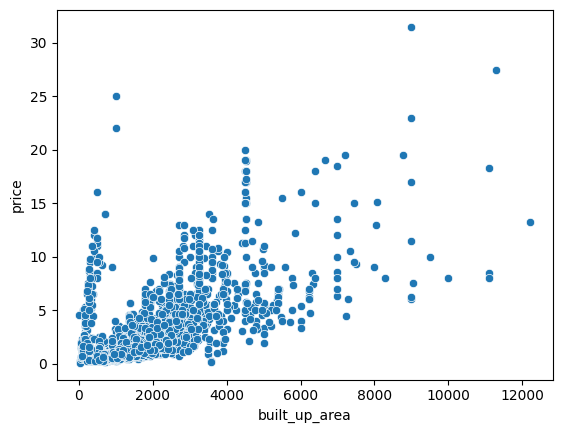

In [28]:
# plot the scatterplot between price and built_up_area column 
sns.scatterplot(data=df, x=df["built_up_area"], y=df["price"]);

#### from the scatterplot, some of the values to the extreme left i.e under the area 2000 are slightly weired so check these values/data

In [29]:
anamoly_area_df = df[(df["built_up_area"] < 2000) & (df["price"] > 2.5)][["area", "price", "built_up_area"]]

In [30]:
# update the values of built_up_area column with area column in the anamoly_area_df
anamoly_area_df["built_up_area"] = anamoly_area_df["area"]

In [31]:
# update the original dataframe 
df.update(anamoly_area_df)

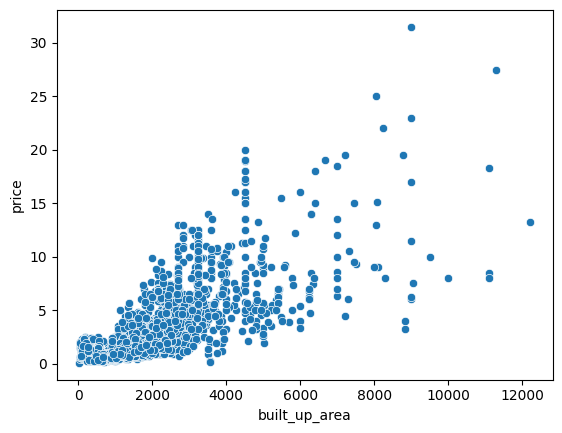

In [32]:
# now plot the scatterplot between built_up_area and price 
sns.scatterplot(data=df, x="built_up_area", y="price");

In [33]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [34]:
# drop the unnecessary columns 
df.drop(columns=["area", "areaWithType", "super_built_up_area", "carpet_area"], inplace=True)

In [35]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat       breez global hill view  sohna road   0.32   
3          flat  bestech park view sanskruti   sector 92   1.60   
4          flat               suncity avenue  sector 102   0.48   

   price_per_sqft  bedRoom  bathroom balcony  floorNum      facing  \
0          7585.0      3.0       2.0       2       2.0         NaN   
1          8600.0      2.0       2.0       2       4.0         NaN   
2          5470.0      2.0       2.0       1      17.0         NaN   
3          8020.0      3.0       4.0      3+      10.0  North-West   
4          9022.0      2.0       2.0       1       5.0  North-East   

    agePossession  built_up_area  study room  servant room  store room  \
0    New Property          850.0         0.0           0.0         0.0   
1    New Property         1226.0         1.0           1.0         0.0   
2    New Property         1000.0         0.0           0.0         0.0   
3  Relatively New         1615.0         0.0           1.0         0.0   
4  Relatively New          582.0         0.0           0.0         1.0   

   pooja room  others  furnishing_type  luxury_score  
0         0.0     0.0              0.0           8.0  
1         0.0     0.0              0.0          38.0  
2         0.0     0.0              0.0          49.0  
3         0.0     1.0              1.0         174.0  
4         0.0     0.0              0.0         159.0

In [36]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1071
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [37]:
df["floorNum"].isnull().sum()

17

In [38]:
df[df["floorNum"].isnull()]

property_type                  society             sector  price  \
503          house              independent           sector 4   0.65   
776          house              independent           sector 7   6.50   
1310         house              independent           sector 3   1.50   
1480         house       vipul tatvam villa          sector 48   8.50   
1493         house  ansal sushant lok plots          sector 43   3.30   
1986         house               jacob pura          sector 12   0.35   
2089         house       vipul tatvam villa          sector 48   8.50   
2202         house              independent           sector 4   4.12   
2320         house       emaar mgf marbella          sector 66   9.00   
2497         house     dlf new town heights          sector 86   2.47   
2601          flat                      NaN          sector 78   0.60   
2610         house        ansal sushant lok          sector 43  10.50   
3003         house              independent          sector 25  13.00   
3055         house              independent          sector 24   1.45   
3213         house              independent          sector 26   4.60   
3319          flat       experion heartsong  dwarka expressway   1.08   
3361         house              independent           sector 2   5.60   

      price_per_sqft  bedRoom  bathroom balcony  floorNum      facing  \
503          11111.0      4.0       2.0       2       NaN         NaN   
776          15046.0      3.0       2.0      3+       NaN         NaN   
1310         10288.0      3.0       3.0       0       NaN         NaN   
1480         26235.0      4.0       4.0       1       NaN         NaN   
1493         26570.0      1.0       1.0       0       NaN         NaN   
1986          9722.0      2.0       1.0       0       NaN         NaN   
2089         26235.0      4.0       4.0       2       NaN        East   
2202          8889.0      2.0       1.0      3+       NaN         NaN   
2320         21251.0      4.0       4.0      3+       NaN  South-West   
2497          7718.0      4.0       4.0      3+       NaN        West   
2601          3692.0      2.0       2.0       0       NaN         NaN   
2610         27911.0      4.0       4.0       2       NaN  North-East   
3003         45710.0      6.0       8.0      3+       NaN         NaN   
3055          2984.0      3.0       3.0       1       NaN         NaN   
3213         12198.0      4.0       4.0      3+       NaN         NaN   
3319          6150.0      3.0       3.0       0       NaN         NaN   
3361         17284.0      8.0       6.0      3+       NaN  South-West   

           agePossession  built_up_area  study room  servant room  store room  \
503       Moderately Old          585.0         0.0           0.0         0.0   
776         Old Property         4320.0         0.0           0.0         0.0   
1310        Old Property          210.0         0.0           0.0         0.0   
1480      Relatively New         3240.0         0.0           0.0         0.0   
1493  Under Construction         1242.0         0.0           0.0         0.0   
1986        Old Property          360.0         0.0           0.0         0.0   
2089      Moderately Old         3240.0         0.0           1.0         1.0   
2202      Moderately Old         4635.0         0.0           0.0         0.0   
2320      Relatively New         5200.0         0.0           1.0         1.0   
2497      Moderately Old         2800.0         0.0           1.0         0.0   
2601  Under Construction         1625.0         0.0           0.0         0.0   
2610        Old Property         3762.0         0.0           1.0         0.0   
3003      Relatively New         2844.0         1.0           1.0         1.0   
3055        Old Property          540.0         0.0           0.0         0.0   
3213        Old Property         3771.0         0.0           0.0         0.0   
3319  Under Construction         1758.0         0.0           0.0         0.0  

fill the missing values in floornum column with the median of the floornum where the property type is house. As most of the missing values in the floornum column has property type house.

In [39]:
df["floorNum"].fillna(df[df["property_type"] == "house"]["floorNum"].median(), inplace=True)

In [40]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1071
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### facing 

In [41]:
df[df["facing"].isnull()]

property_type                                       society  \
0             flat                       signature global park 4   
1             flat                              smart world gems   
2             flat                        breez global hill view   
10           house                                   independent   
20            flat                                 m3m woodshire   
21            flat                                godrej habitat   
23           house                                   independent   
25            flat                            chanderlok society   
26           house                                   independent   
28            flat                               emaar digihomes   
36           house           international city by sobha phase 1   
37            flat                                the arzoo cghs   
48            flat                              smart world gems   
50            flat                signature global the millennia   
52            flat                                tulip monsella   
61            flat                         adani aangan galleria   
67            flat                              smart world gems   
71            flat                                   rof aalayas   
75           house                               bhim garh kheri   
81            flat                                  godrej oasis   
83            flat                     orris carnation residency   
84           house                                   independent   
88           house                                   independent   
89           house                                unitech espace   
93            flat                             gls arawali homes   
97            flat                              ashiana mulberry   
101           flat                          umang monsoon breeze   
104           flat                      spaze privvy the address   
111           flat                       signature global solera   
114           flat                                   zara aavaas   
116           flat                                   m3m capital   
117          house                                   independent   
118           flat                      breez global heights 88a   
119           flat                           south city 1 floors   
125           flat                            unitech south park   
126          house                                    hero homes   
127           flat                       shree vardhman victoria   
129          house                       vatika signature villas   
131           flat                                 m3m soulitude   
133           flat                signature global the millennia   
144           flat                             dlf regal gardens   
146          house                      unitech uniworld resorts   
148           flat                            mapsko mount ville   
156           flat                                   godrej icon   
163           flat                           smart world orchard   
165           flat                            supertech araville   
166           flat                       la vida by tata housing   
172           flat                        dlf garden city floors   
183           flat                       signature global solera   
184           flat                          hsiidc sidco aravali   
186           flat                          whiteland blissville   
188           flat                    central park flower valley   
192           flat                        tulsiani easy in homes   
195           flat                             conscient elevate   
201           flat                               ramsons kshitij   
209           flat                                m3m golfestate   
212           flat                                 gls avenue 51   
218           flat                          breez global heig

In [42]:
df["facing"].value_counts()

North-East    626
East          622
North         380
West          241
South         228
North-West    189
South-East    170
South-West    153
Name: facing, dtype: int64

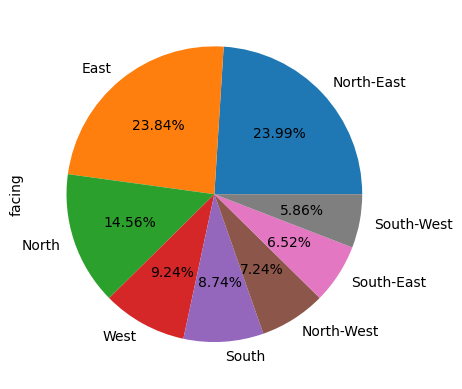

In [43]:
df["facing"].value_counts().plot(kind="pie", autopct="%0.2f%%");

In [44]:
# dropping the entire column (about 28% data is missing in this column)
df["facing"].isnull().sum()

1071

In [45]:
df.drop(columns=["facing"], inplace=True)

In [46]:
df.head()

property_type                      society      sector  price  \
0          flat      signature global park 4   sector 36   0.82   
1          flat             smart world gems   sector 89   0.95   
2          flat       breez global hill view  sohna road   0.32   
3          flat  bestech park view sanskruti   sector 92   1.60   
4          flat               suncity avenue  sector 102   0.48   

   price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
0          7585.0      3.0       2.0       2       2.0    New Property   
1          8600.0      2.0       2.0       2       4.0    New Property   
2          5470.0      2.0       2.0       1      17.0    New Property   
3          8020.0      3.0       4.0      3+      10.0  Relatively New   
4          9022.0      2.0       2.0       1       5.0  Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0          850.0         0.0           0.0         0.0         0.0     0.0   
1         1226.0         1.0           1.0         0.0         0.0     0.0   
2         1000.0         0.0           0.0         0.0         0.0     0.0   
3         1615.0         0.0           1.0         0.0         0.0     1.0   
4          582.0         0.0           0.0         1.0         0.0     0.0   

   furnishing_type  luxury_score  
0              0.0           8.0  
1              0.0          38.0  
2              0.0          49.0  
3              1.0         174.0  
4              0.0         159.0

### society

In [47]:
df[df["society"].isnull()]

property_type society     sector  price  price_per_sqft  bedRoom  \
2601          flat     NaN  sector 78    0.6          3692.0      2.0   

      bathroom balcony  floorNum       agePossession  built_up_area  \
2601       2.0       0       2.0  Under Construction         1625.0   

      study room  servant room  store room  pooja room  others  \
2601         0.0           0.0         0.0         0.0     0.0   

      furnishing_type  luxury_score  
2601              0.0           0.0

In [48]:
# drop the row, as there are multiple categories in this column so we cannot fill it easily (and its just a single row)
df.drop(index=[2601], inplace=True)

### agePossession

In [49]:
df["agePossession"].value_counts()

Relatively New        1634
New Property           590
Moderately Old         557
Undefined              318
Old Property           300
Under Construction     280
Name: agePossession, dtype: int64

There are about 318 properties which are undefined. So we have to deal with this also. 

In [50]:
df[df["agePossession"] == "Undefined"]

property_type                                  society      sector  \
10           house                              independent  sector 109   
33           house                              greenopolis   sector 89   
48            flat                         smart world gems   sector 89   
71            flat                              rof aalayas  sector 102   
75           house                          bhim garh kheri    sector 3   
84           house                              independent  sector 105   
88           house                              independent   sector 55   
91            flat                pivotal devaan apartments   sector 84   
92           house                              independent    sector 4   
101           flat                     umang monsoon breeze   sector 78   
111           flat                  signature global solera  sector 107   
116           flat                              m3m capital  sector 113   
119           flat                      south city 1 floors   sector 41   
127           flat                  shree vardhman victoria   sector 70   
148           flat                       mapsko mount ville   sector 79   
150           flat                             essel towers   sector 14   
198           flat           ramson kshitij sec-95 gurugram   sector 95   
201           flat                          ramsons kshitij   sector 95   
210           flat                 signature global city 81   sector 81   
220          house                              independent    sector 1   
225           flat                          spectrum centre  sector 82a   
250          house                              independent    sector 9   
253           flat                           dlf the arbour   sector 63   
255          house                               ninex city   sector 76   
259           flat                    unitech heritage city   sector 14   
268          house                              independent   sector 69   
271           flat                     umang monsoon breeze   sector 78   
272           flat                 pareena coban residences   sector 99   
275           flat                              m3m heights   sector 65   
288          house                    dlf city plot phase 4   sector 28   
292          house                              independent    sector 5   
295          house                              independent    sector 7   
305           flat                       godrej nature plus   sector 33   
318           flat                           raheja sampada   sector 92   
319          house                              independent    sector 6   
323          house                              independent   sector 28   
342           flat                          ramsons kshitij   sector 95   
343           flat                     umang monsoon breeze   sector 78   
346           flat                              m3m heights   sector 65   
356           flat                           dlf the arbour   sector 63   
362          house                              independent    sector 3   
368          house                              independent   sector 11   
371          house                              independent   sector 56   
377           flat                            the roselia 2   sector 95   
407          house                              independent   sector 81   
464           flat                           kibithu villas   sector 48   
476          house                              independent    sector 1   
486           flat               central park flower valley   sector 33   
492           flat                         smart world gems   sector 89   
510           flat                             essel towers   sector 14   
527          house                              independent   sector 24   
542          house                              independent  sector 37d   
552           flat            

In [51]:
# consider both sector and property_type while finding the mode value and filling the missing value 
def agePossession_mode_imputation1(row):
    if row["agePossession"] == "Undefined":
        mode_value = df[(df["sector"] == row["sector"]) & (df["property_type"] == row["property_type"])]["agePossession"].mode()
        
        # if mode value present return mode value else return nan
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row["agePossession"]

In [52]:
agePossession_mode_imputation1(df[df["agePossession"] == "Undefined"].iloc[0])

'Relatively New'

In [53]:
df[df["agePossession"] == "Undefined"].iloc[0]

property_type            house
society            independent
sector              sector 109
price                     1.55
price_per_sqft          6567.0
bedRoom                    3.0
bathroom                   2.0
balcony                      0
floorNum                   1.0
agePossession        Undefined
built_up_area           2360.0
study room                 0.0
servant room               0.0
store room                 0.0
pooja room                 0.0
others                     0.0
furnishing_type            0.0
luxury_score               0.0
Name: 10, dtype: object

In [54]:
df[(df["sector"] == "sector 109") & (df["property_type"] == "house")][["sector", "agePossession"]].value_counts()

sector      agePossession 
sector 109  Relatively New    24
            New Property       8
            Moderately Old     2
            Undefined          2
dtype: int64

In [55]:
df["agePossession"] = df.apply(agePossession_mode_imputation1, axis=1)

In [56]:
df["agePossession"].value_counts()

Relatively New        1755
New Property           637
Moderately Old         599
Old Property           333
Under Construction     297
Undefined               58
Name: agePossession, dtype: int64

In [57]:
# find the mode with the help of sector only 
def agePossession_mode_imputation2(row):
    if row["agePossession"] == "Undefined":
        mode_value = df[(df["sector"] == row["sector"])]["agePossession"].mode()
        
        # if mode value present return mode value else return nan
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row["agePossession"]

In [58]:
agePossession_mode_imputation2(df[df["agePossession"] == "Undefined"].iloc[0])

'New Property'

In [59]:
df["agePossession"] = df.apply(agePossession_mode_imputation2, axis=1)

In [60]:
df["agePossession"].value_counts()

Relatively New        1770
New Property           638
Moderately Old         606
Old Property           339
Under Construction     297
Undefined               29
Name: agePossession, dtype: int64

In [61]:
# find the mode with the help of property_type only 
def agePossession_mode_imputation3(row):
    if row["agePossession"] == "Undefined":
        mode_value = df[(df["property_type"] == row["property_type"])]["agePossession"].mode()
        
        # if mode value present return mode value else return nan
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row["agePossession"]

In [62]:
agePossession_mode_imputation3(df[df["agePossession"] == "Undefined"].iloc[0])

'Moderately Old'

In [63]:
df[df["agePossession"] == "Undefined"].iloc[0]

property_type                house
society            bhim garh kheri
sector                    sector 3
price                          1.5
price_per_sqft              7576.0
bedRoom                        7.0
bathroom                       2.0
balcony                          0
floorNum                       1.0
agePossession            Undefined
built_up_area               1980.0
study room                     0.0
servant room                   0.0
store room                     0.0
pooja room                     0.0
others                         0.0
furnishing_type                0.0
luxury_score                   0.0
Name: 75, dtype: object

In [64]:
df["agePossession"] = df.apply(agePossession_mode_imputation3, axis=1)

In [65]:
df["agePossession"].value_counts()

Relatively New        1772
New Property           638
Moderately Old         633
Old Property           339
Under Construction     297
Name: agePossession, dtype: int64

Finally filled all the data where the agePossession is Undefined.

In [66]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [68]:
# save the dataframe 
df.to_csv("gurgaon_missing_values_treated.csv", index=False)